In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import h5py
import sys
import os
import glob
import warnings
from pprint import pprint
import matplotlib.pyplot as plt

from tqdm import tqdm

basedir = '/project/vitelli/jonathan/REDO_fruitfly/'
sys.path.insert(0, os.path.join(basedir, 'release'))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 6

warnings.filterwarnings('ignore')

../Public/WT/ECad-GFP/202001281800
../Public/WT/ECad-GFP/202001282000
../Public/WT/ECad-GFP/202001281430
../Public/WT/ECad-GFP/202001261800
../Public/WT/ECad-GFP/202001271040
../Public/WT/ECad-GFP/202001280915


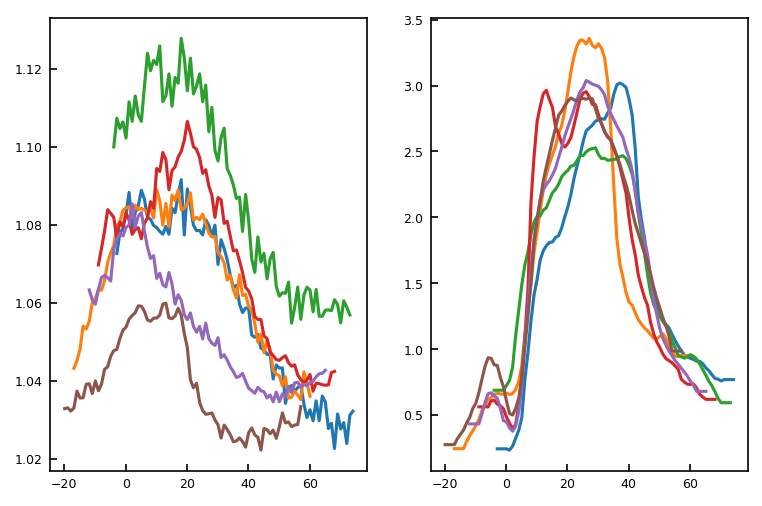

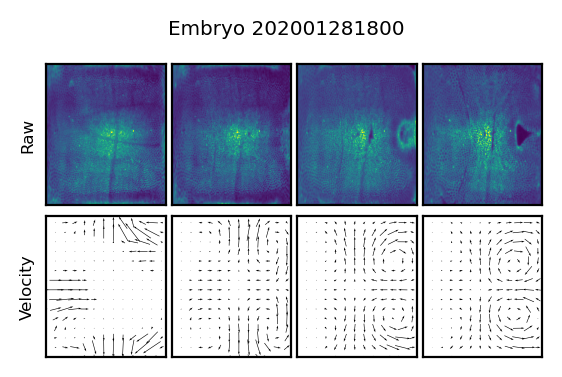

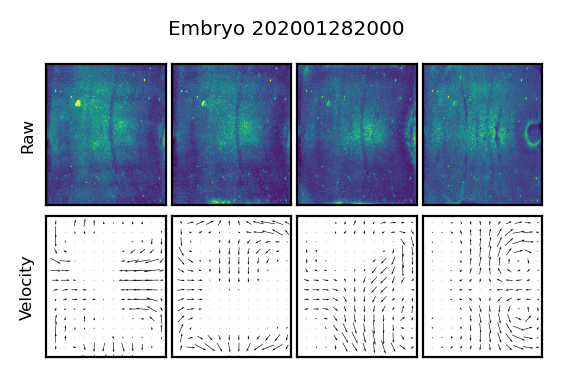

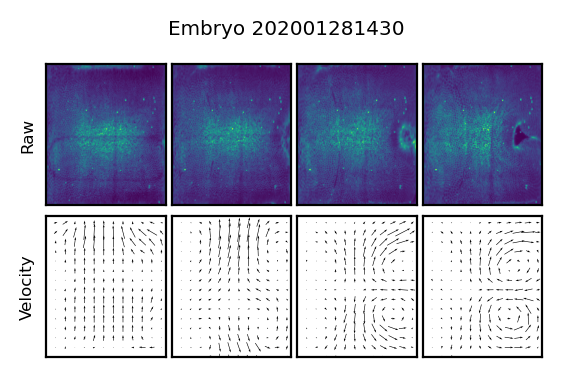

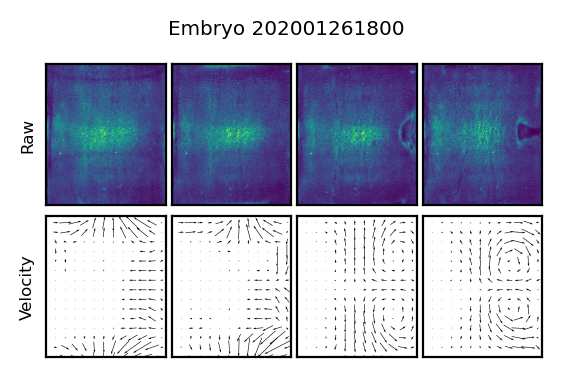

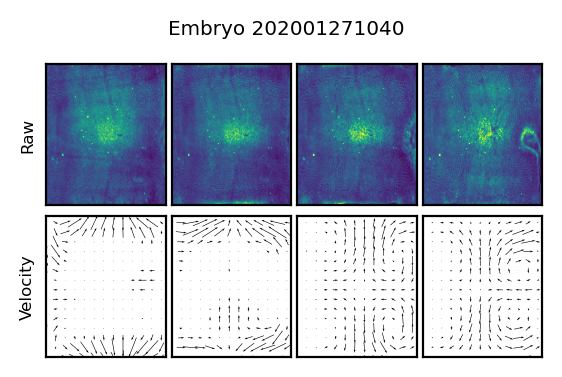

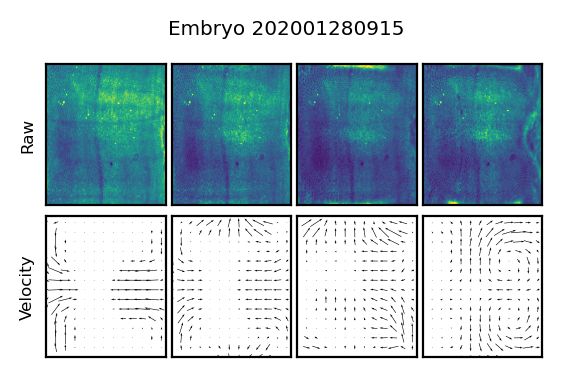

In [41]:
from utils.plot_utils import *
folder = '../Public/WT/ECad-GFP'
offsets = pd.read_csv(f'{folder}/morphodynamic_offsets.csv', index_col='embryoID')
df = pd.read_csv(f'{folder}/dynamic_index.csv')
N = 4
dt = 10

fig1, ax1 = plt.subplots(1, 2, dpi=150)

for i, path in enumerate(glob.glob(f'{folder}/202*')):
    print(path)
    
    fig, ax = plt.subplots(2, N, figsize=(N*0.8, 2), sharex=True, sharey=True, dpi=200)
    
    raw = np.load(f'{path}/raw2D.npy', mmap_mode='r')
    vel = np.load(f'{path}/velocity2D.npy', mmap_mode='r')
    
    eId = int(os.path.basename(path))
    t = df.loc[df.embryoID == eId, 'time'] - offsets.loc[int(os.path.basename(path)), 'offset']
    ax1[0].plot(t, np.mean(raw, axis=(1,2)))
    ax1[1].plot(t, np.mean(np.linalg.norm(vel, axis=1), axis=(1,2)))
    
    cmin = np.median(cyt) - np.std(cyt)
    cmax = cmin + 5 * np.std(cyt)
    
    for i in range(N):
        color_2D(ax[0, i], raw[i*dt], cmap='viridis', vmax_std=10)
        plot_vector2D(ax[1, i], vel[i*dt], skip=16)
        
    fig.suptitle(f'Embryo {os.path.basename(path)}')
    ax[0, 0].set_ylabel('Raw')
    ax[1, 0].set_ylabel('Velocity')
    ax[0, 0].set_xlim([ap_min, ap_max])
    ax[0, 0].set_ylim([dv_min, dv_max])

    fig.subplots_adjust(hspace=0.01, wspace=0.05)

../Public/WT/Moesin-GFP/202001231400
../Public/WT/Moesin-GFP/202001271215
../Public/WT/Moesin-GFP/202001101740
../Public/WT/Moesin-GFP/202001262040
../Public/WT/Moesin-GFP/202001231555
../Public/WT/Moesin-GFP/202002111638
../Public/WT/Moesin-GFP/202001271700
../Public/WT/Moesin-GFP/202001261520
../Public/WT/Moesin-GFP/202001121330


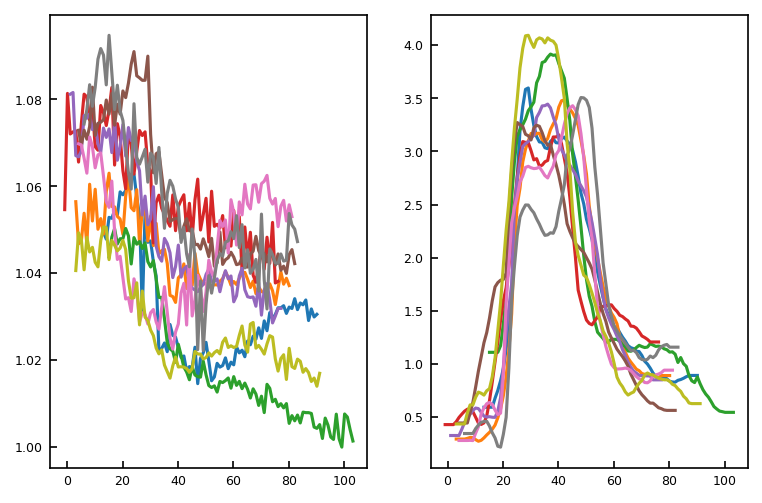

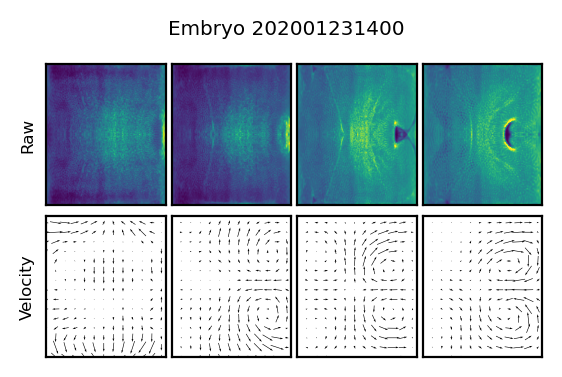

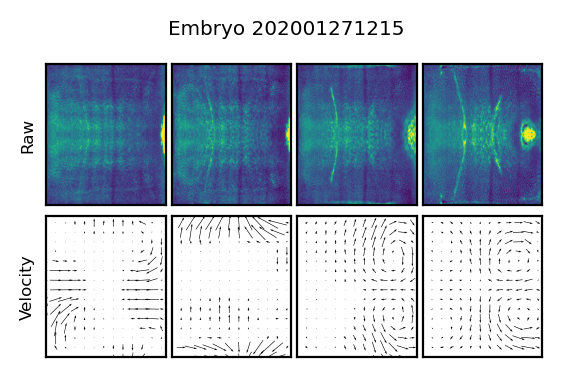

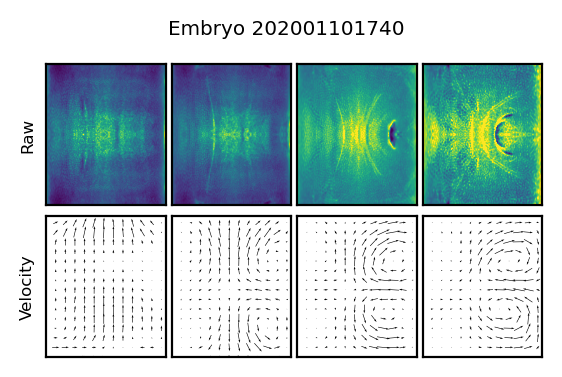

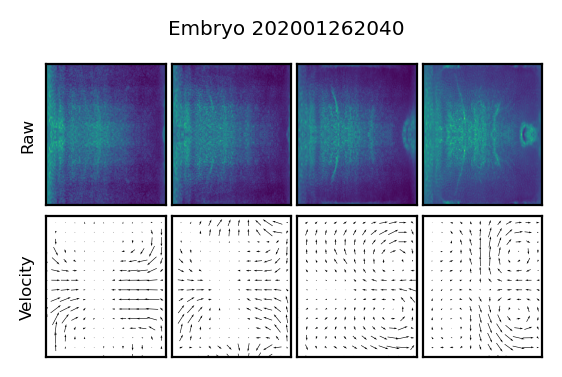

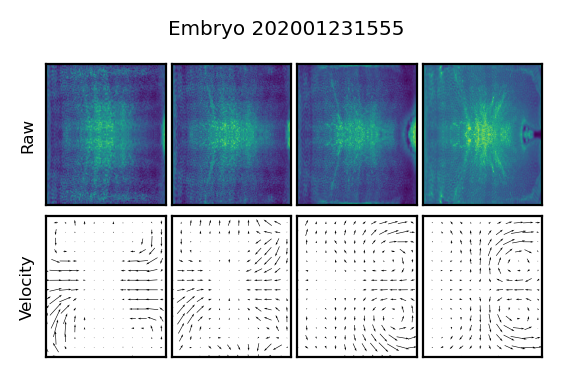

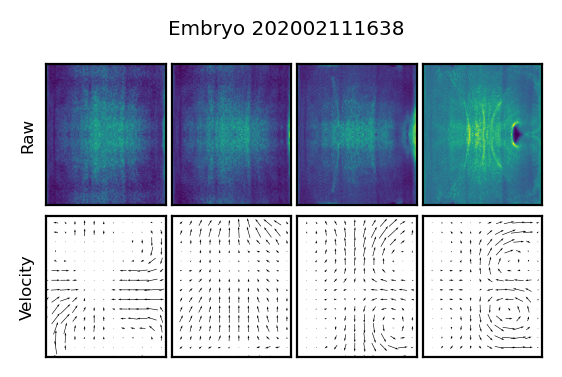

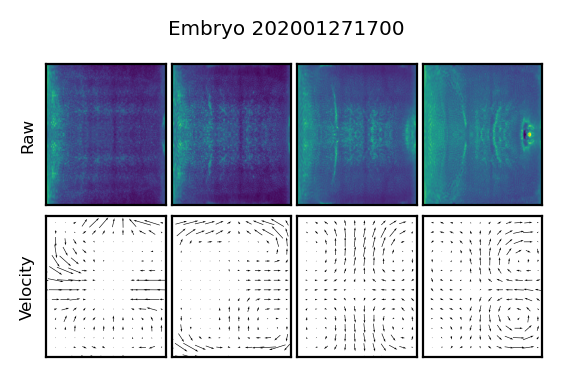

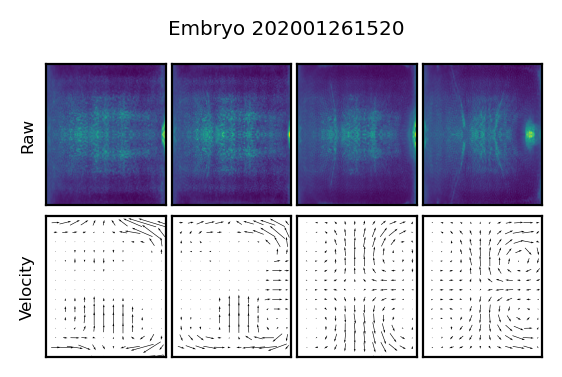

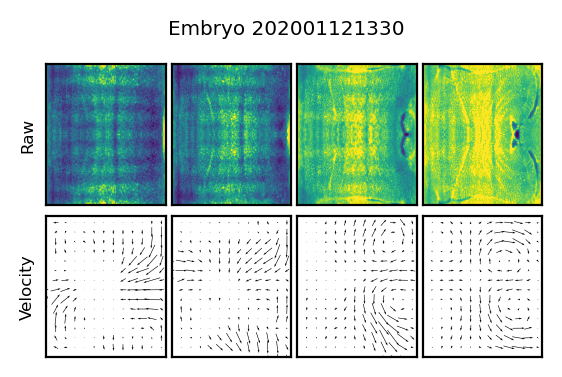

In [45]:
from utils.plot_utils import *
folder = '../Public/WT/Moesin-GFP'
#offsets = pd.read_csv(f'{folder}/morphodynamic_offsets.csv', index_col='embryoID')
df = pd.read_csv(f'{folder}/dynamic_index.csv')
N = 4
dt = 10

fig1, ax1 = plt.subplots(1, 2, dpi=150)

for i, path in enumerate(glob.glob(f'{folder}/202*')):
    print(path)
    
    fig, ax = plt.subplots(2, N, figsize=(N*0.8, 2), sharex=True, sharey=True, dpi=200)
    
    raw = np.load(f'{path}/raw2D.npy', mmap_mode='r')
    vel = np.load(f'{path}/velocity2D.npy', mmap_mode='r')
    
    eId = int(os.path.basename(path))
    t = df.loc[df.embryoID == eId, 'time'] #- offsets.loc[int(os.path.basename(path)), 'offset']
    ax1[0].plot(t, np.mean(raw, axis=(1,2)))
    ax1[1].plot(t, np.mean(np.linalg.norm(vel, axis=1), axis=(1,2)))
    
    cmin = np.median(cyt) - np.std(cyt)
    cmax = cmin + 5 * np.std(cyt)
    
    for i in range(N):
        ri = raw[i*dt]
        
        color_2D(ax[0, i], 0.5 * (ri + ri[::-1]), cmap='viridis', vmax_std=10)
        plot_vector2D(ax[1, i], vel[i*dt], skip=16)
        
    fig.suptitle(f'Embryo {os.path.basename(path)}')
    ax[0, 0].set_ylabel('Raw')
    ax[1, 0].set_ylabel('Velocity')
    ax[0, 0].set_xlim([ap_min, ap_max])
    ax[0, 0].set_ylim([dv_min, dv_max])

    fig.subplots_adjust(hspace=0.01, wspace=0.05)